In [1]:
# import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Creating the Loan_df data frame from loan.csv data

In [4]:
Loan_df =pd.read_csv('loan.csv')

# Data understanding and cleaning

##### check  for header and footer and if available remove them

In [5]:
Loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
Loan_df.tail(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### check for dulicates

In [7]:
Loan_df.duplicated().sum()

0

##### check for header and footer rows

In [8]:
Loan_df.shape

(39717, 111)

* Header footer not available <br>
* Total number of rows 39717 <br>
* Total nuber of columns 111

### Handling missing values

In [9]:
# checking the null values

In [10]:
Loan_df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

###### There are columns has all null values should be removed as it wont contribute for analyses

In [11]:
# Removing the null value columns

In [12]:
Loan_df.dropna(how='all',axis=1,inplace=True)

In [13]:
# verifying the datafrme after Removing the null value columns

In [14]:
Loan_df.shape

(39717, 57)

* 54 columns are having all null values

In [15]:
# computation of null value percentage

In [16]:
Null_counts=round((Loan_df.isna().sum()/len(Loan_df))*100,2)

In [17]:
Null_counts

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

###### More than 5% Null values variables are not contributing for analyses of defaulters hence remove them

In [18]:
# selecting the columns having null values more than 5%

In [19]:

col=Null_counts[Null_counts>5].index
col

Index(['emp_title', 'desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d'],
      dtype='object')

In [20]:
# Removing the columns having null values more than 5%

In [21]:
Loan_df.drop(col, axis=1,inplace=True)


In [22]:
# Analysing the data frame after performing the opertion

In [23]:
Loan_df.shape

(39717, 52)

In [24]:
Loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [25]:
# Analysing loan_staus column data

In [26]:
Loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

- The aim is to identify patterns which indicate if a person is likely to default hence  the data belongs to current wont contribute for analyses

###### Removing the data belongs to Current from loan_status

In [27]:
Loan_df=Loan_df[Loan_df['loan_status']!='Current']

In [28]:
# Analysing data frame after performing the opertion

In [29]:
Loan_df.shape

(38577, 52)

###### Check and remove the unique value equal to one

- One unique value doesnot contribute for analyses

In [30]:
# Find the unique values of Loan_df data frme

In [31]:
Unique_val=Loan_df.nunique()
Unique_val

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths                    9
open_acc                         40
pub_rec                     

In [32]:
# removing the columns having only one unique value as it wont add any value to anlyses

In [33]:
U_col=Unique_val[Unique_val==1].index
U_col

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [34]:
Loan_df.drop(U_col, axis=1,inplace=True)

In [35]:
# Analysing datafrme after Removing the only one unique value columns

In [36]:
Loan_df.shape

(38577, 41)

In [37]:
# Analysing the columns of Loan_df

In [38]:
Loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

- 41 variables are availble out of that the following variables are attributes of loan approval process which doesnot contribute for analyses of defaulters hence remove them

 'id','member_id','url','funded_amnt','funded_amnt_inv','title','zip_code','addr_state','delinq_2yrs','earliest_cr_line','inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc','total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','pub_rec_bankruptcies'
       

##### Create new data frame with the variables for analyses of defaulters

In [39]:
Loan_Def=Loan_df[['loan_amnt','term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state','dti']]

In [40]:
Loan_Def.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20


In [41]:
# computing the percentage of null values

In [42]:
round(100*(Loan_Def.isna().sum()/len(Loan_Def)),2)

loan_amnt              0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
dtype: float64

### Imputing the missing values

* For Numerical values with median or mean
* For categorical variables with mode

In [43]:
# Analysing dtypes null value columns

In [44]:
Loan_Def['emp_length'].dtypes

dtype('O')

In [45]:
# imputing the 'emp_length' with mode

In [46]:
Loan_Def['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [47]:
Loan_Def['emp_length']=Loan_Def['emp_length'].fillna(Loan_Def['emp_length'].mode()[0])

In [48]:
# Analysing data frame after performing the opertion

In [49]:
Loan_Def['emp_length'].isna().sum()

0

### Handling incorrect data types

In [50]:
Loan_Def.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00


In [51]:
# Analysing data types of Loan_Def

In [52]:
Loan_Def.dtypes

loan_amnt                int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

#### After observing the data types of columns the following operations to be performed to anlyse the data
- Term object type to be converted to int dtype <br>
- int_rate object type to be converted to float dtype <br>
- issue_d object type to be converted to datetime format

In [53]:
# Analysing'term ' column data

In [54]:
Loan_Def.term.value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [55]:
len(' months')

7

- Converting object type to int for 'term' column and Assigning to new column 'term_month'

In [56]:
# Removing the 'month' string and assigning to new column 'term_month'

In [57]:
Loan_Def['term_month'] = pd.to_numeric(Loan_Def['term'].apply(lambda x : x[:-7]))

In [58]:
# Analysing data frame after performing the opertion

In [59]:
Loan_Def['term_month'].head()

0    36
1    60
2    36
3    36
5    36
Name: term_month, dtype: int64

In [60]:
# Analysing data frame after performing the opertion

In [61]:
Loan_Def['term_month'].value_counts()

term_month
36    29096
60     9481
Name: count, dtype: int64

###### Converting int_rate data Object to float type

In [62]:
# Analysing int_rate column

In [63]:
Loan_Def.int_rate.value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [64]:
# Standardizing int_rate column and type casting

In [65]:
Loan_Def['int_rate']= pd.to_numeric(Loan_Def['int_rate'].apply(lambda x : x.split('%')[0] ))

In [66]:
# Analysing data frame after performing the opertion

In [67]:
Loan_Def.int_rate.value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

###### Standardizing of 'emp_length' and type casting

- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }

In [68]:
#Loan_Def['emp_length']= pd.to_numeric(Loan_Def.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [69]:
# Analysing data frame after performing the opertion

In [70]:
Loan_Def['emp_length'].value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

##### 'issue_d ' dtype convertion from object type to datetime format

In [71]:
Loan_Def.issue_d.head(2)

0    Dec-11
1    Dec-11
Name: issue_d, dtype: object

In [72]:
Loan_Def.issue_d = pd.to_datetime(Loan_Def.issue_d , format='%b-%y')

In [73]:
Loan_Def.issue_d.head(3)

0   2011-12-01
1   2011-12-01
2   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [74]:
Loan_Def.Year = Loan_Def.issue_d.dt.year

In [75]:
Loan_Def.Year.value_counts()

issue_d
2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

### Handling out liers

In [76]:
Loan_Def.loan_amnt.value_counts()

loan_amnt
10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: count, Length: 870, dtype: int64

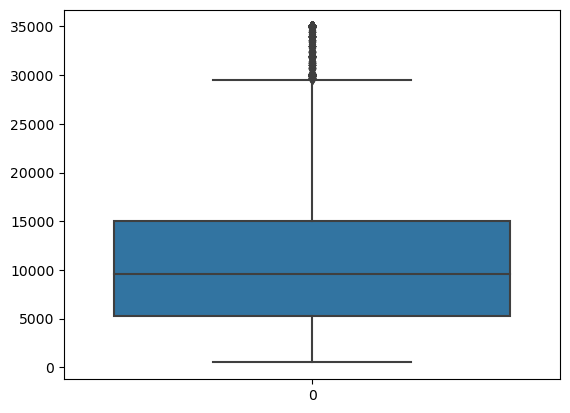

In [77]:
sns.boxplot(Loan_Def.loan_amnt)
plt.show()

-Clearly indicates the outliers hence analyse quantile info 75% t0 100% 

In [78]:
frequency_data=Loan_Def.loan_amnt.quantile([.75,.80,.85,.90,.95,1])
frequency_data

0.75    15000.0
0.80    16000.0
0.85    20000.0
0.90    21600.0
0.95    25000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

- Sudden variation at 95% hence remove the data < 95%

In [79]:
frequency_95=Loan_Def.loan_amnt.quantile(.95)

In [80]:
Loan_Def = Loan_Def[Loan_Def['loan_amnt']<frequency_95]

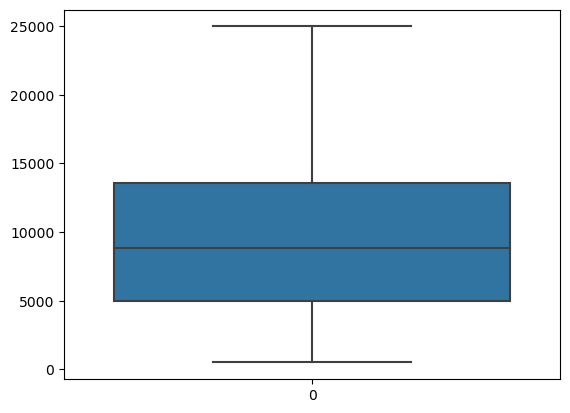

In [81]:
sns.boxplot(Loan_Def.loan_amnt)
plt.show()

###### Check the outliers for other Numaric variables
- int_rate
- installment
- annual_inc
- dti

<Axes: >

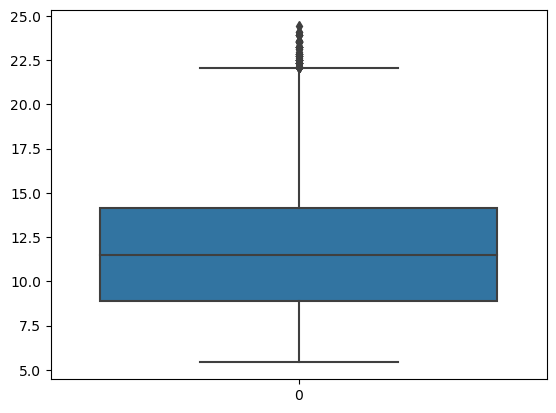

In [82]:
sns.boxplot(Loan_Def.int_rate)

-Clearly indicates the outliers hence analyse quantile info 75% t0 100% 

In [83]:
int_outlier=Loan_Def.int_rate.quantile([.75,.80,.85,.90,.95,1])
int_outlier

0.75    14.17
0.80    14.83
0.85    15.62
0.90    16.45
0.95    17.80
1.00    24.40
Name: int_rate, dtype: float64

- Sudden variation at 95% hence remove the data < 95%

In [84]:
intdata_95=Loan_Def.int_rate.quantile(.95)

In [85]:
Loan_Def = Loan_Def[Loan_Def['int_rate']<intdata_95]

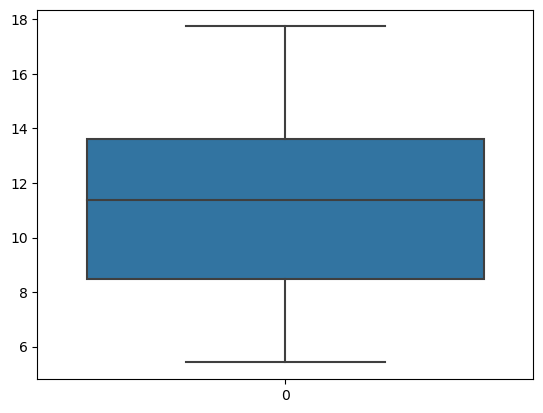

In [86]:
sns.boxplot(Loan_Def.int_rate)
plt.show()

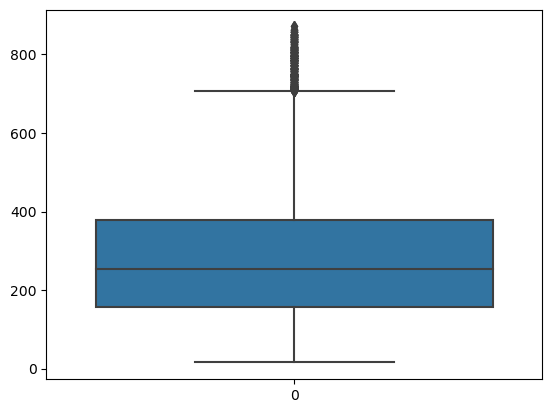

In [87]:
sns.boxplot(Loan_Def.installment)
plt.show()

-Clearly indicates the outliers hence analyse quantile info 75% t0 100% 

In [88]:
install_outlier=Loan_Def.int_rate.quantile([.75,.80,.85,.90,.95,1])
install_outlier

0.75    13.61
0.80    14.27
0.85    14.91
0.90    15.65
0.95    16.49
1.00    17.74
Name: int_rate, dtype: float64

- Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns

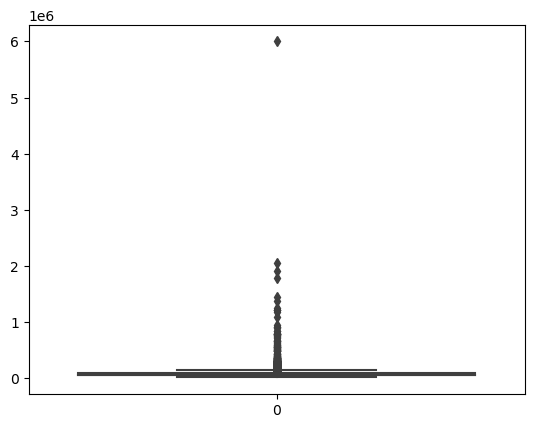

In [89]:
sns.boxplot(Loan_Def.annual_inc)
plt.show()

-Clearly indicates the outliers hence analyse quantile info 75% t0 100% 

In [90]:
annual_inc_outlier=Loan_Def.annual_inc.quantile([.75,.80,.85,.90,.95,1])
annual_inc_outlier

0.75      78000.000
0.80      85000.000
0.85      95000.000
0.90     107217.056
0.95     130000.000
1.00    6000000.000
Name: annual_inc, dtype: float64

- Sudden variation at 95% hence remove the data < 95%

In [91]:
annual_inc_95=Loan_Def.annual_inc.quantile(.95)

In [92]:
Loan_Def = Loan_Def[Loan_Def['annual_inc']<annual_inc_95]

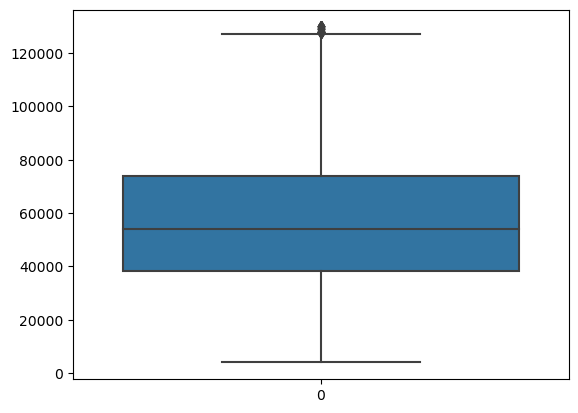

In [93]:
sns.boxplot(Loan_Def.annual_inc)
plt.show()

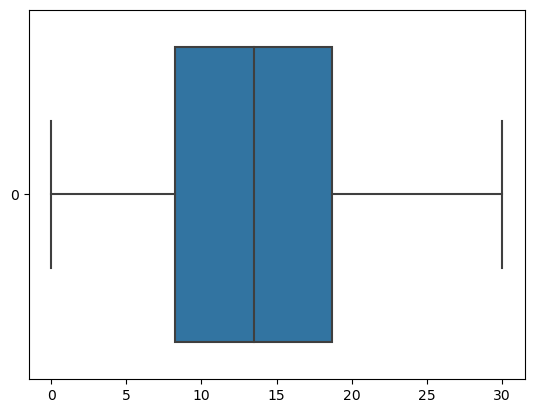

In [94]:
sns.boxplot(Loan_Def.dti, orient='h')
plt.show()

- Box plot clearly indicates no outliers

In [95]:
Loan_Def.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
term_month                      int64
dtype: object

## UNIVARIATE ANALYSES

#### Visualizing Categorical Data

In [96]:
round(100*(len(Loan_Def[Loan_Def['loan_status']=='Charged Off'])/len(Loan_Def)),2)

13.36

<Axes: xlabel='loan_status', ylabel='count'>

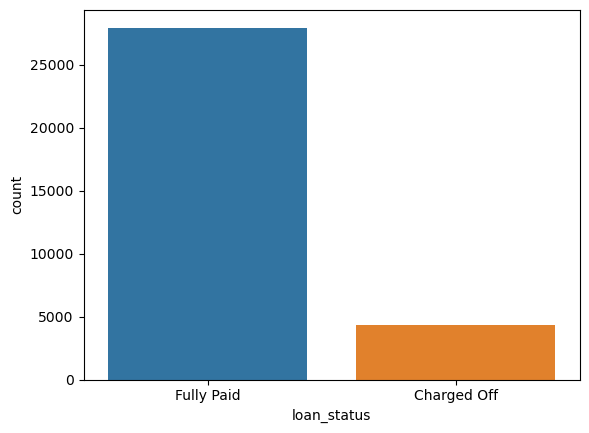

In [97]:
#plt.hist(Loan_Def['loan_status'])
sns.countplot(x='loan_status',data=Loan_Def)

- 13.36 % of loan applicants are Defaulted

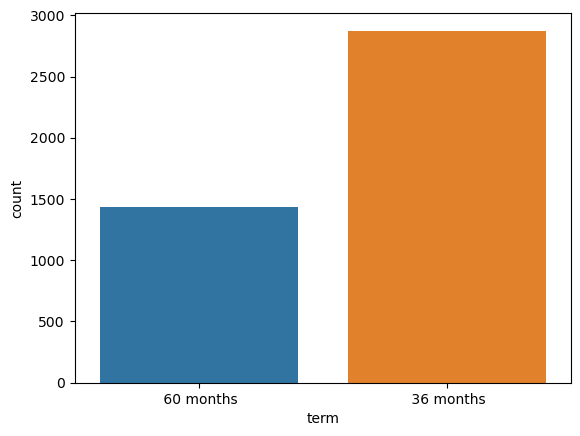

In [98]:
#plt.hist(Loan_Def[Loan_Def['loan_status']=='Charged Off'].term)
sns.countplot(x='term',data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- Short term applicants are more likely to become defaulted

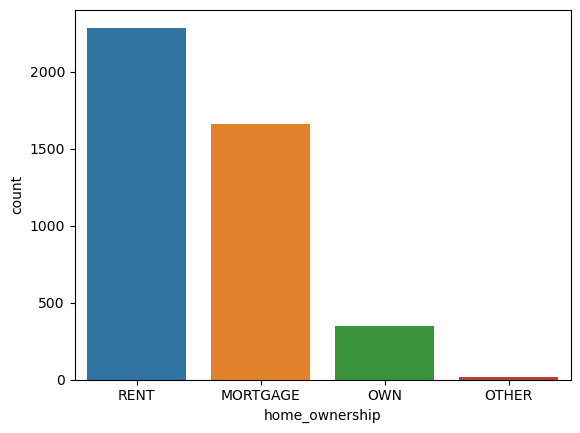

In [99]:
sns.countplot(x='home_ownership', data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- The applicants who lives in Rent homes more likely to become defaulted

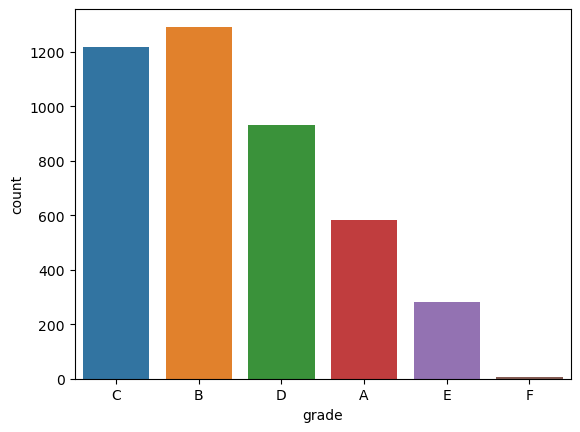

In [100]:
sns.countplot(x='grade',data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- The B Grade applicants are more likely to become defaulted

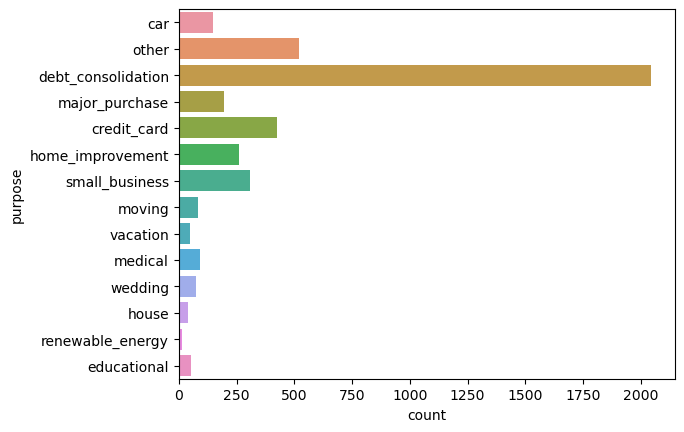

In [101]:
sns.countplot(y='purpose',data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- The applicants Loan purpose to clear debts, are more likely to become defaulted.

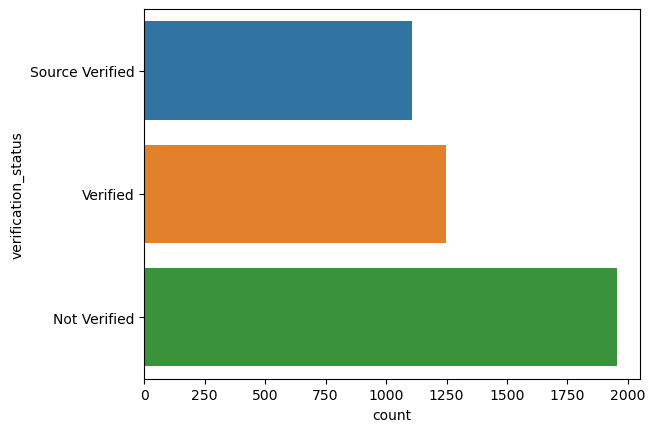

In [102]:
sns.countplot(y='verification_status',data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- Not Verified applicants are more likely to become defaulted.

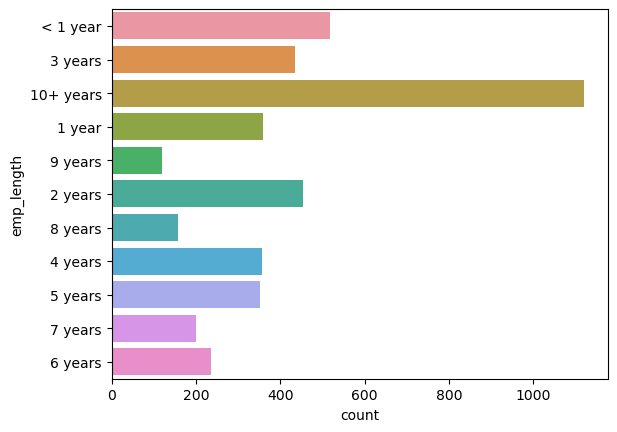

In [103]:
sns.countplot(y='emp_length',data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- The applicants Employment length is 10 and above are more likely to become defaulted.

#### Visualizing Quantitative Variables

- Creating bins for some numerical variable to make them categorical

In [104]:
# Creating bins for 'loan_amnt' , 'int_rate' , 'installment' , 'annual_inc' , 'dti'

In [105]:
print('loan_amnt Range - ',Loan_Def['loan_amnt'].min(),'to',Loan_Def['loan_amnt'].max())

loan_amnt Range -  500 to 24925


In [106]:
Loan_Def['loan_amnt_groups'] = pd.cut(Loan_Def['loan_amnt'], bins=5,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k'])

In [107]:
print('int_rate Range - ',Loan_Def['int_rate'].min(),'to',Loan_Def['int_rate'].max())

int_rate Range -  5.42 to 17.74


In [108]:
Loan_Def['int_rate_groups'] = pd.cut(Loan_Def['int_rate'], bins=3,precision =0,labels=['0%-6%','6%-12%','12%-18%'])

In [109]:
print('installment Range - ',Loan_Def['installment'].min(),'to',Loan_Def['installment'].max())

installment Range -  15.69 to 871.35


In [110]:
Loan_Def['installment_groups'] = pd.cut(Loan_Def['installment'], bins=5,precision =0,labels=['0-180','180-360','360-540','540-720','720-900'])

In [111]:
print('annual_inc Range - ',Loan_Def['annual_inc'].min(),'to',Loan_Def['annual_inc'].max())

annual_inc Range -  4000.0 to 129996.0


In [112]:
Loan_Def['annual_inc_groups'] = pd.cut(Loan_Def['annual_inc'], bins=5,precision =0,labels=['0-30k','30k-60k','60k-90k','90k-120k','120k-150k'])

In [113]:
print('dti Range - ',Loan_Def['dti'].min(),'to',Loan_Def['dti'].max())

dti Range -  0.0 to 29.99


In [114]:
Loan_Def['dti_groups'] = pd.cut(Loan_Def['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [115]:
# verify the new groups

In [116]:
Loan_Def.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,loan_status,purpose,addr_state,dti,term_month,loan_amnt_groups,int_rate_groups,installment_groups,annual_inc_groups,dti_groups
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,Fully Paid,credit_card,AZ,27.65,36,0-5k,6%-12%,0-180,0-30k,24-30
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,Charged Off,car,GA,1.00,60,0-5k,12%-18%,0-180,30k-60k,0-6
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,Fully Paid,small_business,IL,8.72,36,0-5k,12%-18%,0-180,0-30k,6-12
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,Fully Paid,other,CA,20.00,36,5k-10k,6%-12%,180-360,30k-60k,18-24
5,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,Fully Paid,wedding,AZ,11.20,36,0-5k,0%-6%,0-180,30k-60k,6-12


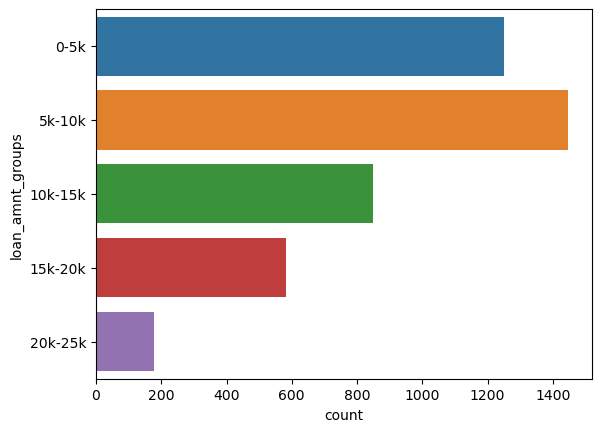

In [117]:
sns.countplot(y='loan_amnt_groups', data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- The loan amount 5k-10k applicants are more likely to become defaulted.

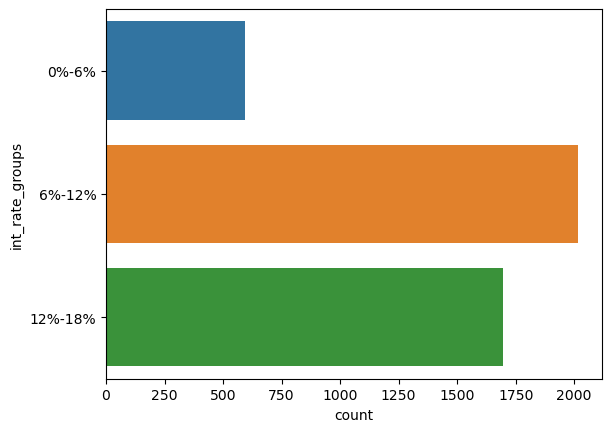

In [118]:
sns.countplot(y='int_rate_groups', data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- The interest rate between 6%-12% applicants are more likely to become defaulted.

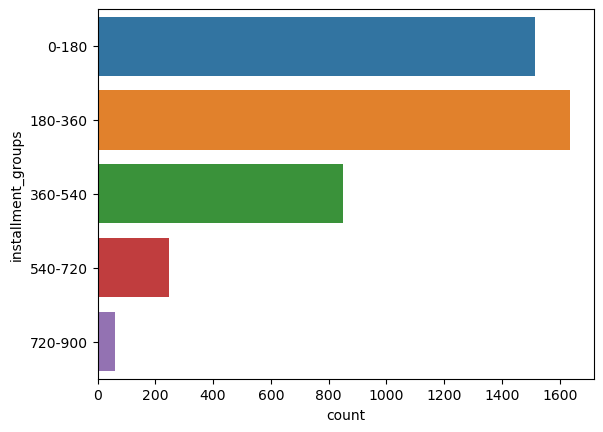

In [119]:
sns.countplot(y='installment_groups', data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- The loan installments between 180-360 applicants are more likely to become defaulted.

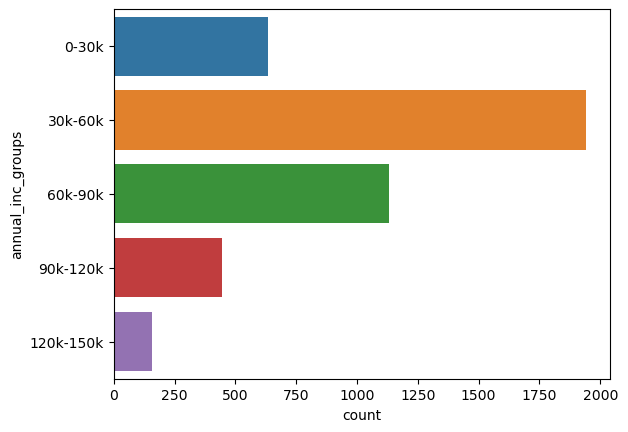

In [120]:
sns.countplot(y='annual_inc_groups', data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- The annual income between 30k-60k applicants are more likely to become defaulted.

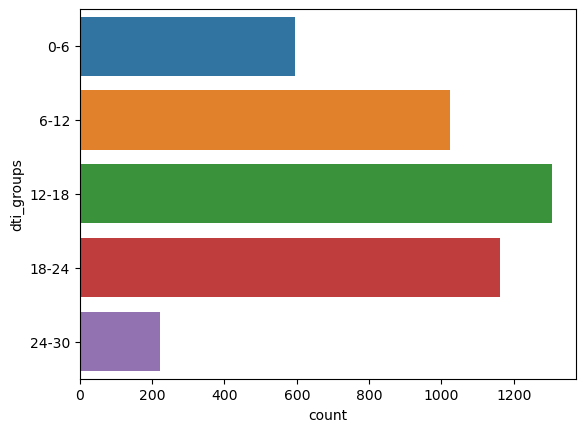

In [121]:
sns.countplot(y='dti_groups', data=Loan_Def[Loan_Def['loan_status']=='Charged Off'])
plt.show()

- The debt to income ratio between 12-18 applicants are more likely to become defaulted.

## BIVARIATE ANALYSIS

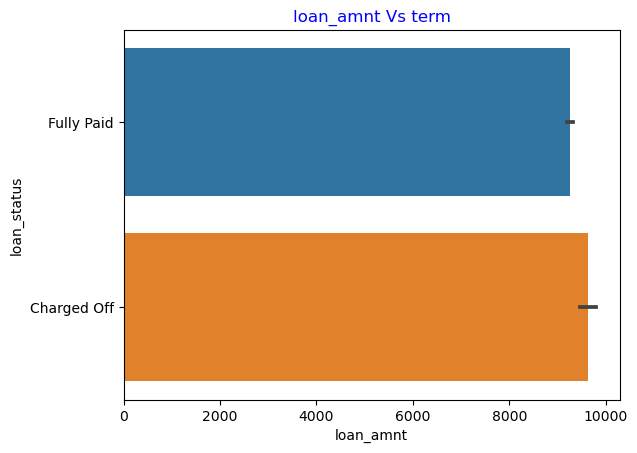

In [122]:
sns.barplot(x='loan_amnt',y='loan_status', data=Loan_Def)
plt.title('loan_amnt Vs term', weight=12, color='b')
plt.show()

- The sanctioned amount for defaulted applicants is slightly high compared with fully paid applicants.

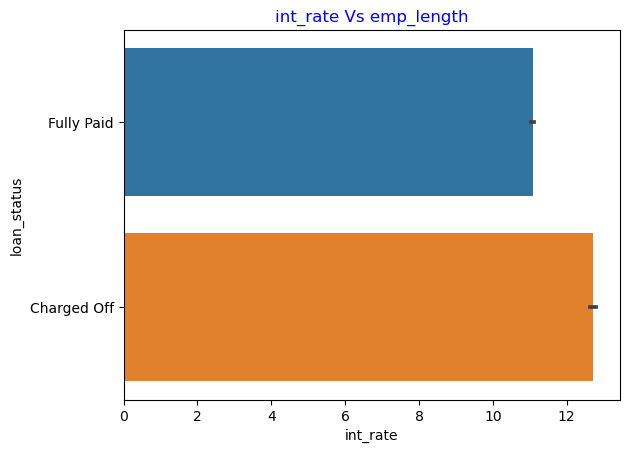

In [123]:
sns.barplot(x='int_rate',y='loan_status', data=Loan_Def)
plt.title('int_rate Vs emp_length', weight=12, color='b')
plt.show()

- The Interest Rate is more for the defaulted applicants.

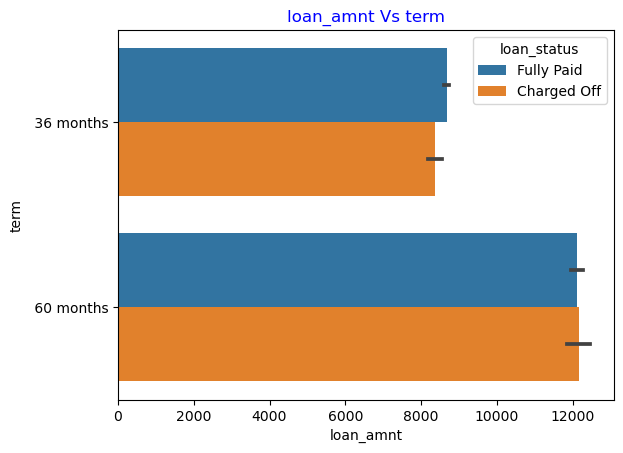

In [124]:
sns.barplot(x='loan_amnt',y='term', data=Loan_Def, hue='loan_status')
plt.title('loan_amnt Vs term', weight=12, color='b')
plt.show()

- Loan sanctioned amount is same for both applicants in longer term and slightly less in case of short term for the defaulted applicants.  

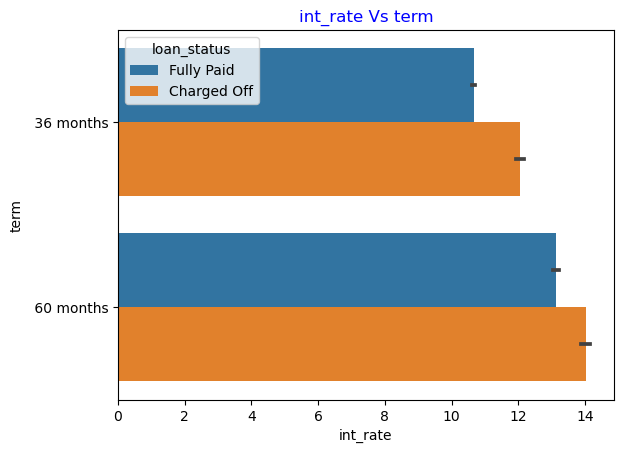

In [125]:
sns.barplot(x='int_rate',y='term', data=Loan_Def, hue='loan_status')
plt.title('int_rate Vs term', weight=12, color='b')
plt.show()

- The Interest rate is high for defaulted applicants in both terms.

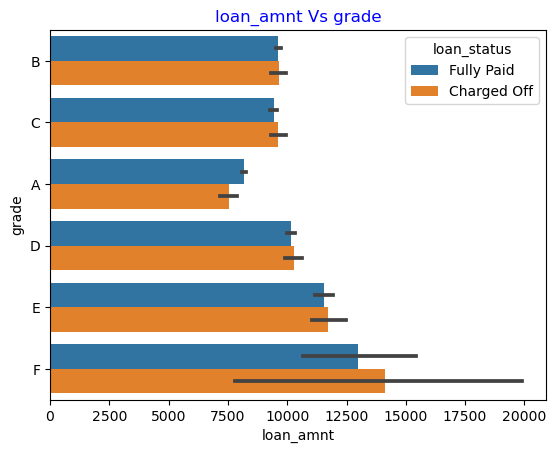

In [126]:
sns.barplot(x='loan_amnt',y='grade', data=Loan_Def, hue='loan_status')
plt.title('loan_amnt Vs grade', weight=12, color='b')
plt.show()

- The sanctioned amount is more in all grades except A grade for defaulted applicants and the sanctioned amount is in proportion to the Grade.

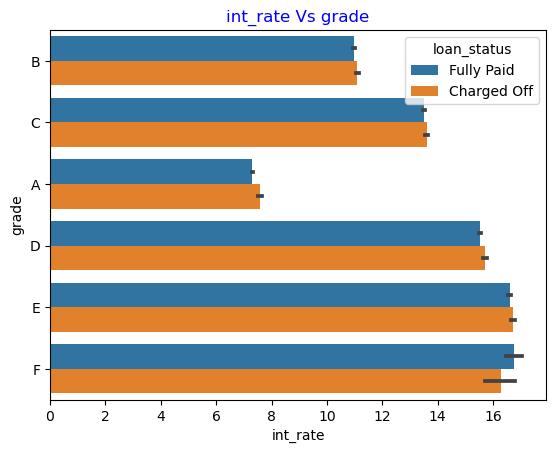

In [127]:
sns.barplot(x='int_rate',y='grade', data=Loan_Def, hue='loan_status')
plt.title('int_rate Vs grade', weight=12, color='b')
plt.show()

- The variation in interest rates for both applicants is not significant with respect to Grade.

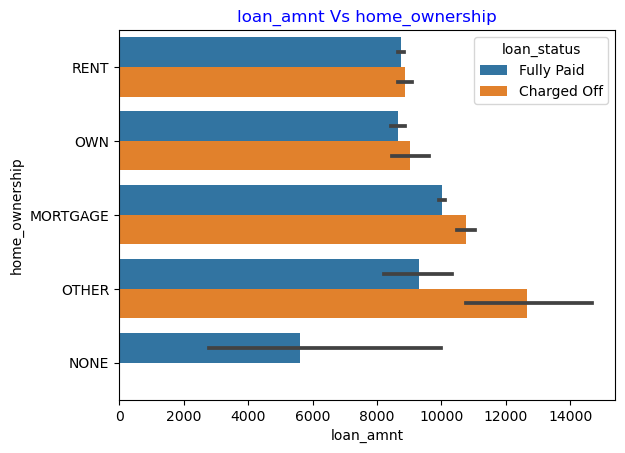

In [128]:
sns.barplot(x='loan_amnt',y='home_ownership', data=Loan_Def, hue='loan_status')
plt.title('loan_amnt Vs home_ownership', weight=12, color='b')
plt.show()

- Loan sanctioned amounts are high for defaulted applicants in all Ownerships and is Highest in Ownership category 'OTHER' .

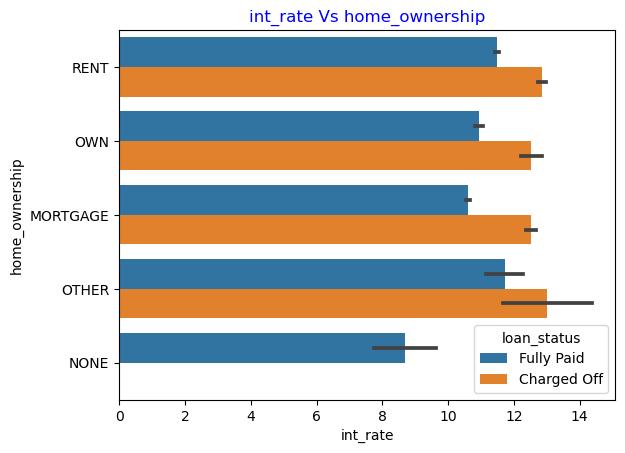

In [129]:
sns.barplot(x='int_rate',y='home_ownership', data=Loan_Def, hue='loan_status')
plt.title('int_rate Vs home_ownership', weight=12, color='b')
plt.show()

- Interest rates are more than 12% for the defaulted applicants and less than 12% for fully paid applicants in all Ownerships .

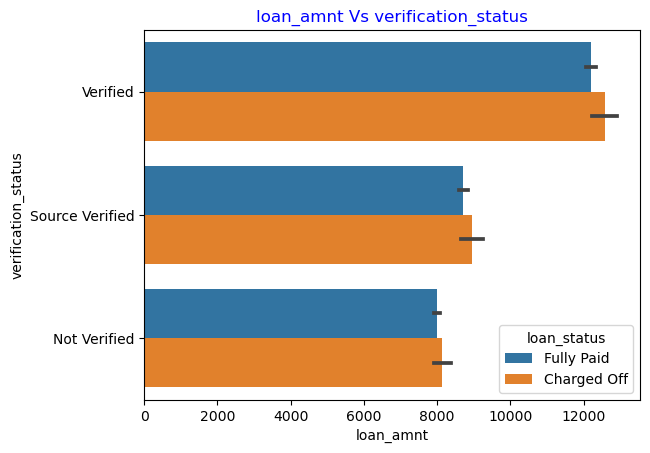

In [130]:
sns.barplot(x='loan_amnt',y='verification_status', data=Loan_Def, hue='loan_status')
plt.title('loan_amnt Vs verification_status', weight=12, color='b')
plt.show()

- Loan sanctioned amounts are slightly high for defaulters in proportion to verification status i.e high for verified and low for not verified.

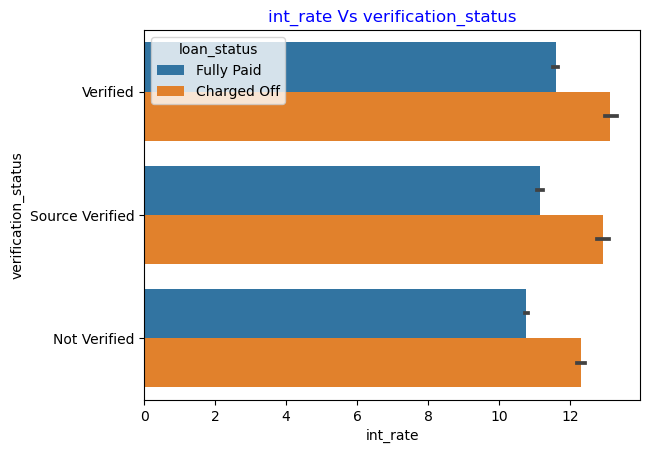

In [131]:
sns.barplot(x='int_rate',y='verification_status', data=Loan_Def, hue='loan_status')
plt.title('int_rate Vs verification_status', weight=12, color='b')
plt.show()

- Interest rates are more than 12 % for defaulted applicants and less than 12% for fully paid applicants irrespective of verification status.

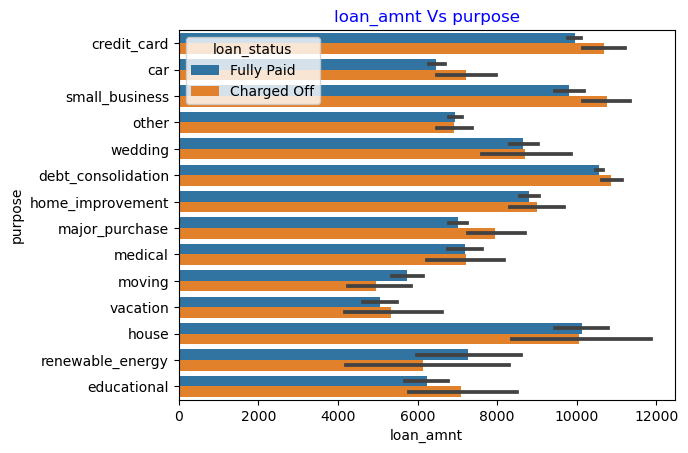

In [132]:
sns.barplot(x='loan_amnt',y='purpose', data=Loan_Def, hue='loan_status')
plt.title('loan_amnt Vs purpose', weight=12, color='b')
plt.show()

- No significant variation in sanctioned amounts for the both applicants except renewable_energy and highest for the purpose debt_consolidation.

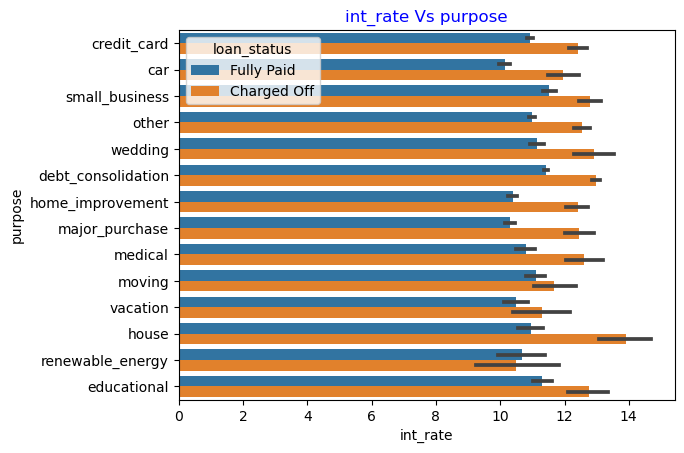

In [133]:
sns.barplot(x='int_rate',y='purpose', data=Loan_Def, hue='loan_status')
plt.title('int_rate Vs purpose', weight=12, color='b')
plt.show()

- Interest rates are more than 12 % for defaulted applicants and less than 12% for fully paid applicants for all Purposes except renewable_enegy.

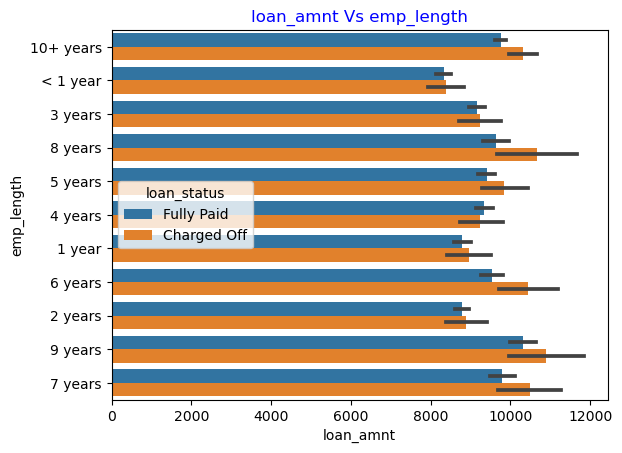

In [134]:
sns.barplot(x='loan_amnt',y='emp_length', data=Loan_Def, hue='loan_status')
plt.title('loan_amnt Vs emp_length', weight=12, color='b')
plt.show()

- Loan sanctioned amounts are slightly more for defaulters in all employee lengths except 4 years.

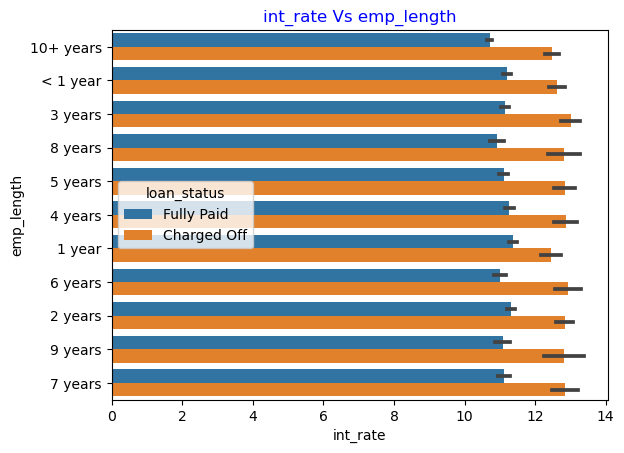

In [135]:
sns.barplot(x='int_rate',y='emp_length', data=Loan_Def, hue='loan_status')
plt.title('int_rate Vs emp_length', weight=12, color='b')
plt.show()

- Interest rates are more than 12 % for defaulted applicants and less than 12% for fully paid applicants for all employee lengths.

## DERIVED METRICS

- Derive the Categorical variables 'month' and 'year' and analyse the defaulters data.

In [136]:
Loan_Def['Month'] = Loan_Def['issue_d'].dt.month
Loan_Def['Year'] = Loan_Def['issue_d'].dt.year

In [137]:
# Visuvalize month and year columns

In [138]:
Loan_Def[['Month', 'Year']].head()

,Month,Year
0,12,2011
1,12,2011
2,12,2011
3,12,2011
5,12,2011


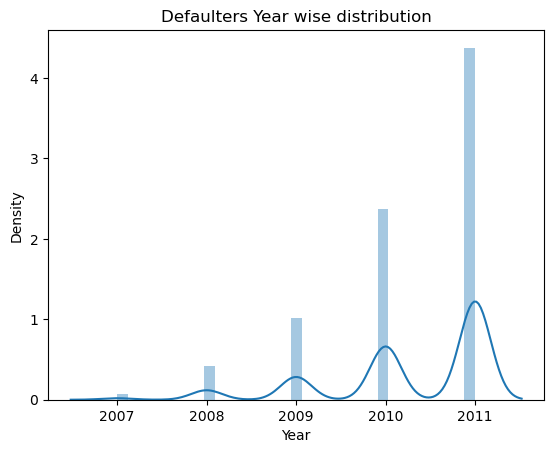

In [139]:
sns.distplot(Loan_Def[Loan_Def['loan_status']=='Charged Off'].Year)
plt.title('Defaulters Year wise distribution', weight=12)
plt.show()

- The defaulted loans are in increasing trend and highest in 2011.

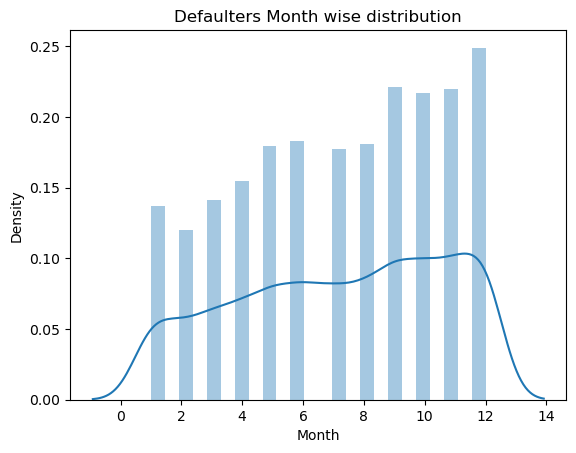

In [140]:
sns.distplot(Loan_Def[Loan_Def['loan_status']=='Charged Off'].Month, bins=24)
plt.title('Defaulters Month wise distribution', weight=12)
plt.show()

- The loans issued in the year ending are more likely to become defaulted and is highest in December.

In [159]:
Def_loan=Loan_Def[Loan_Def['loan_status']=='Charged off']

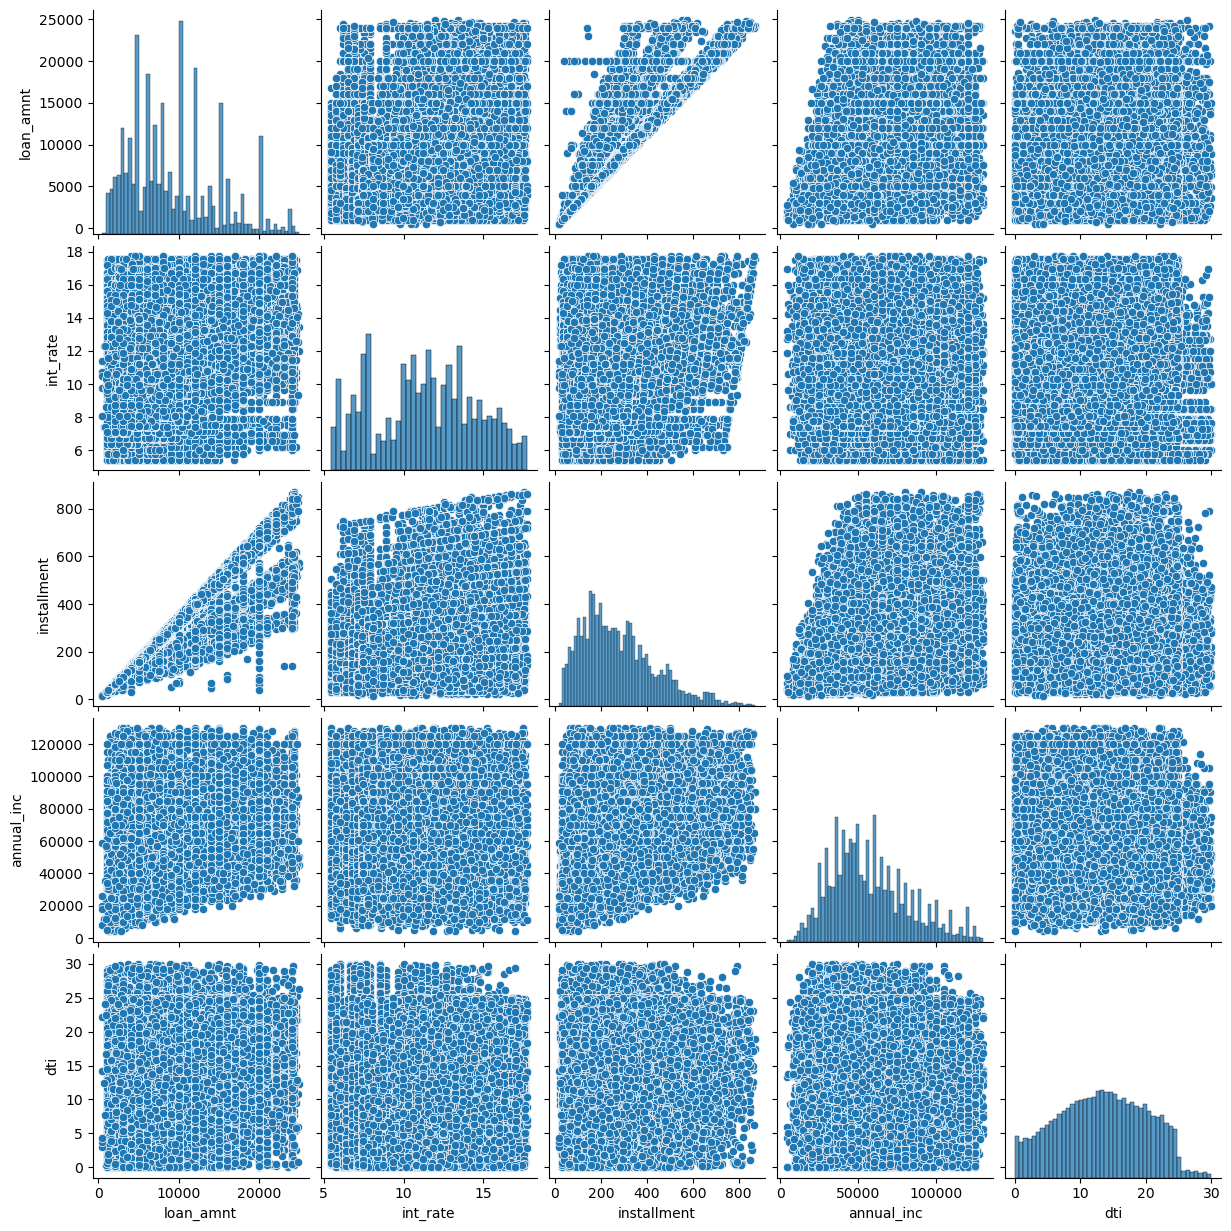

In [158]:
sns.pairplot(Loan_Def[['loan_amnt','int_rate','installment','annual_inc','dti']])
plt.show()

- Loan amount and interest rate correlation is strong at low value loan amounts and increased proportionate to interest rates.
- Loan amount and installments correlation is linear i.e increased proportionate to Loan amount.
- Loan amount and annual inc correlation is strong at low value loan amounts and decreased with Loan amount.
- Loan amount and dti correlation is strong at low value loan amounts compared to high value Loan amounts.
- Install ments and interest rate correlation is varies from low to high inline with interest rates .
- Install ments and annual inc correlation is varies from low to high inline with interest rates.


### Correlation Matrix

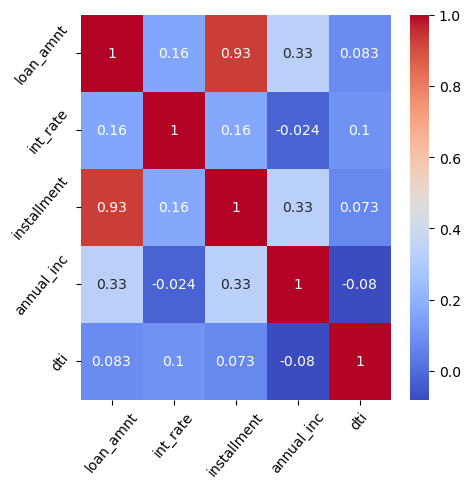

In [157]:
numeric_columns = ['loan_amnt','int_rate','installment','annual_inc','dti']
correlation_matrix = Loan_Def[numeric_columns].corr()
f,ax = plt.subplots(figsize= (5,5))

sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,
           cmap= 'coolwarm', annot = True)
plt.xticks(rotation=50)
plt.yticks(rotation=50)
plt.show()


- Annual income and interest rates are negitive corelation shows lending club offered less interest rates for more income people and more interest to less income people.